Google Drive location

In [ ]:
#Importing CSV File Needed Using Client Account
from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

train_file_id = '1gxP9ltyThoRwkFRJrUdscap-8Eee2rQZ'
test_file_id = '1umHoCWY_xxcxoYx4EtbDnTM2UInJjGVH'

download = drive.CreateFile({'id': train_file_id})
download.GetContentFile('train.csv')

download = drive.CreateFile({'id': test_file_id})
download.GetContentFile('test.csv')

Simple csv files extraction (Requires both files train and test csv on root folder)

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import re as re

train = pd.read_csv('train.csv' , header = 0, dtype={'Age': np.float64})
test  = pd.read_csv('test.csv' , header = 0, dtype={'Age': np.float64})
full_data = [train, test]

print (train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


Sample of the dataset

In [ ]:
df_table = pd.DataFrame(train)
df_table

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Correlation matrix of the raw dataset before preprocessing

In [ ]:
corr_matrix = df_table.corr()
corr_matrix["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

Checking survival rates for different groupings. Adding some of these groupings to the dataset as part of feature selection

In [ ]:
print (train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean())

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


In [ ]:
print (train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean())

      Sex  Survived
0  female  0.742038
1    male  0.188908


In [ ]:
for dataset in full_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
print (train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())

   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000


In [ ]:
for dataset in full_data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
print (train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean())

   IsAlone  Survived
0        0  0.505650
1        1  0.303538


In [ ]:
for dataset in full_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
print (train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean())

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009


In [ ]:
for dataset in full_data:
    dataset['Fare'] = dataset['Fare'].fillna(train['Fare'].median())
train['CategoricalFare'] = pd.qcut(train['Fare'], 4)
print (train[['CategoricalFare', 'Survived']].groupby(['CategoricalFare'], as_index=False).mean())

   CategoricalFare  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081


In [ ]:
for dataset in full_data:
    age_avg 	   = dataset['Age'].mean()
    age_std 	   = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)
    
train['CategoricalAge'] = pd.cut(train['Age'], 5)

print (train[['CategoricalAge', 'Survived']].groupby(['CategoricalAge'], as_index=False).mean())

  CategoricalAge  Survived
0  (-0.08, 16.0]  0.542373
1   (16.0, 32.0]  0.341518
2   (32.0, 48.0]  0.383673
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909


<ipython-input-7-ab350db0cf93>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list


In [ ]:
def get_title(name):
	title_search = re.search(' ([A-Za-z]+)\.', name)
	# If the title exists, extract and return it.
	if title_search:
		return title_search.group(1)
	return ""

for dataset in full_data:
    dataset['Title'] = dataset['Name'].apply(get_title)

print(pd.crosstab(train['Title'], train['Sex']))

Sex       female  male
Title                 
Capt           0     1
Col            0     2
Countess       1     0
Don            0     1
Dr             1     6
Jonkheer       0     1
Lady           1     0
Major          0     2
Master         0    40
Miss         182     0
Mlle           2     0
Mme            1     0
Mr             0   517
Mrs          125     0
Ms             1     0
Rev            0     6
Sir            0     1


In [ ]:
for dataset in full_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

print (train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean())

    Title  Survived
0  Master  0.575000
1    Miss  0.702703
2      Mr  0.156673
3     Mrs  0.793651
4    Rare  0.347826


Preprocessing the data to normalize it into integers

In [ ]:
for dataset in full_data:
    # Mapping Sex
    dataset['Sex'] = dataset['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
    
    # Mapping titles
    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    
    # Mapping Embarked
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    
    # Mapping Fare
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] 						        = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] 							        = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
    
    # Mapping Age
    dataset.loc[ dataset['Age'] <= 16, 'Age'] 					       = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']                           = 4

# Feature Selection
drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp',
                 'Parch', 'FamilySize']
train = train.drop(drop_elements, axis = 1)
train = train.drop(['CategoricalAge', 'CategoricalFare'], axis = 1)

test  = test.drop(drop_elements, axis = 1)

print (train.head(10))

train_aux = train
test_aux = test

train = train.values
test  = test.values

   Survived  Pclass  Sex  Age  Fare  Embarked  IsAlone  Title
0         0       3    1    1     0         0        0      1
1         1       1    0    2     3         1        0      3
2         1       3    0    1     1         0        1      2
3         1       1    0    2     3         0        0      3
4         0       3    1    2     1         0        1      1
5         0       3    1    2     1         2        1      1
6         0       1    1    3     3         0        1      1
7         0       3    1    0     2         0        0      4
8         1       3    0    1     1         0        0      3
9         1       2    0    0     2         1        0      3


Correlation Matrix after preprocessing:

In [ ]:
corr_matrix = train_aux.corr()
corr_matrix["Survived"].sort_values(ascending=False)

Survived    1.000000
Title       0.407753
Fare        0.295875
Embarked    0.106811
Age        -0.061952
IsAlone    -0.203367
Pclass     -0.338481
Sex        -0.543351
Name: Survived, dtype: float64

Model training and testing for 4 different classifiers. No parameter fine tuning.

,Accuracy,Training Time (s),Testing Time (s),Total Time (s)
Classifier,,,,
XGBClassifier,0.818889,0.816696,0.825912,1.642609
SVC,0.826667,1.542854,1.577236,3.120090
DecisionTreeClassifier,0.796667,0.010741,0.012322,0.023063
RandomForestClassifier,0.810000,1.587004,1.705868,3.292872


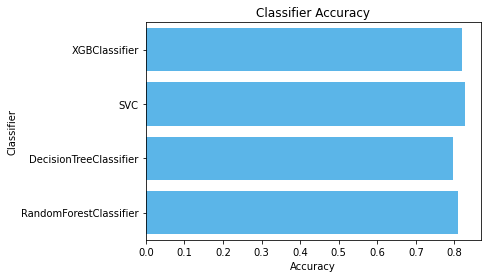

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.model_selection import StratifiedShuffleSplit, train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, log_loss
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

classifiers = [
    XGBClassifier(),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier()]

log_cols = ["Classifier", "Accuracy"]
log 	 = pd.DataFrame(columns=log_cols)

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=0)

X = train[0::, 1::]
y = train[0::, 0]

acc_dict = {}
timing_dict = {}
df = pd.DataFrame(columns=["Classifier", "Accuracy", "Training Time (s)", "Testing Time (s)", "Total Time (s)"])

for clf in classifiers:
	name = clf.__class__.__name__
	elapsed_train_time = []
	elapsed_test_time = []

	for train_index, test_index in sss.split(X, y):
		X_train, X_test = X[train_index], X[test_index]
		y_train, y_test = y[train_index], y[test_index]

		start_train_time = time.time()
		clf.fit(X_train, y_train)
		elapsed_train_time.append((time.time() - start_train_time))
	
		start_test_time = time.time()
		train_predictions = clf.predict(X_test)
		elapsed_test_time.append((time.time() - start_train_time))
	
		acc = accuracy_score(y_test, train_predictions)
	
		if name in acc_dict:
			acc_dict[name] += acc
		else:
			acc_dict[name] = acc

	
	sum_train_time = np.sum(elapsed_train_time)
	sum_test_time = np.sum(elapsed_test_time)
 
	timing_dict[name] = [sum_train_time,
		                     sum_test_time,
												 sum_train_time + sum_test_time]


for clf in acc_dict:
	acc_dict[clf] = acc_dict[clf] / 10.0
	log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
	new_row = {"Classifier": clf, 
	           	"Accuracy": acc_dict[clf], 
							"Training Time (s)": timing_dict[clf][0],
							"Testing Time (s)": timing_dict[clf][1],
							"Total Time (s)": timing_dict[clf][2]}
	df = pd.concat([df, pd.DataFrame([new_row])])
	log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="#4bf")

df.set_index('Classifier', inplace=True)
df

In [ ]:
####################
### EXPERIMENTAL ###
####################
"The Code Below is VERY COARSE and is NOT Intended to be Presented YET."

'The Code Below is VERY COARSE and is NOT Intended to be Presented YET.'

XGBOOST HYPERPARAMETER TUNING

We found out that using XGBoost Hyperparameter Tuning by implementing Grid Search can improve the accuracy of the classifier.

In [ ]:
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import sys

'''train = pd.read_csv("train.csv")
X = train.drop(['Survived','PassengerId'],axis=1)
y = train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
'''
#For classification 

#Random Search
xgb_pipeline = Pipeline([('scaler', StandardScaler()), ('classifier',XGBClassifier())])
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
'''random_search = RandomizedSearchCV(xgb_pipeline, param_distributions=params, n_iter=100,
                                   scoring='f1_weighted', n_jobs=4, verbose=3, random_state=1001 )
random_search.fit(X_train,y_train)'''
#OR

#Grid Search
xgb_pipeline = Pipeline([('scaler', StandardScaler()), ('classifier',XGBClassifier())])
gbm_param_grid = {
    'classifier__learning_rate': np.array([0.01,0.001]),
    'classifier__n_estimators': np.array([100,200,300,400]),
    'classifier__subsample': np.array([0.7,0.8,0.9]),
    'classifier__max_depth': np.array([10,11,12,13,14,15,16,17]),
    'classifier__lambda': np.array([1]),
    'classifier__gamma': np.array([0])
    #'classifier__colsample_bytree': np.arange(0,1.1,.2)
}

grid_search = GridSearchCV(estimator=xgb_pipeline, param_grid=gbm_param_grid, n_jobs= -1,
                         scoring='f1_weighted', verbose=10)

grid_search.fit(X_train,y_train)

#Print out best parameters
'''print(random_search.best_params_)'''
print("Best Parameters", grid_search.best_params_)
#Print out scores on validation set
'''print(random_search.score(X_test,y_test))'''
print("Accuracy: ", grid_search.score(X_test,y_test))

Fitting 5 folds for each of 192 candidates, totalling 960 fits
Best Parameters {'classifier__gamma': 0, 'classifier__lambda': 1, 'classifier__learning_rate': 0.01, 'classifier__max_depth': 10, 'classifier__n_estimators': 400, 'classifier__subsample': 0.7}
Accuracy:  0.8658963585434173


DECISION TREE HYPERPARAMETER TUNING

We unconvered that declaring the range for min_samples_leaf and random_state parameters always resulted in 42 and 2 as best parameters, but also it was negatively impacting the accuracy for reasons we don't understand. We have removed them from the parameters.

Sometimes it lands 0.8 accuracy and sometimes 0.833

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

deciTree_parameters = {"max_depth": [3, 5, 7, 9, 11, 13]}

deciTree_GsCV =GridSearchCV(
		DecisionTreeClassifier(random_state=42, class_weight='balanced'),
		deciTree_parameters,
		cv=5,
		scoring='accuracy'
	)

deciTree_grid_search = deciTree_GsCV
deciTree_grid_search.fit(X_train,y_train)

print("Best Parameters", deciTree_grid_search.best_params_)
print("Accuracy: ", deciTree_grid_search.score(X_test,y_test))

Best Parameters {'max_depth': 11}
Accuracy:  0.8


RANDOM FOREST HYPERPARAMETER TUNING

Sometimes it lands 0.8 accuracy and sometimes 0.833

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]


ranFor_hyperParams = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

ranFor_GsCV =RandomizedSearchCV(
		RandomForestClassifier(random_state=42, class_weight='balanced'),
		param_distributions = ranFor_hyperParams,
		n_iter = 100, cv = 3, 
    verbose=2, 
    random_state=42, 
    n_jobs = -1
	)

ranFor_grid_search = deciTree_GsCV
ranFor_grid_search.fit(X_train,y_train)

print("Best Parameters", ranFor_grid_search.best_params_)
print("Accuracy: ", ranFor_grid_search.score(X_test,y_test))

Best Parameters {'max_depth': 11}
Accuracy:  0.8


SVC HYPERPARAMETER TUNING

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

model = SVC()
model.fit(X_train, y_train)
  
# print prediction results
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

from sklearn.model_selection import GridSearchCV
  
# defining parameter range ORIGINAL
"""param_grid = {'C': list(np.arange(0.1, 1, 0.1)), 
              'gamma': list(np.arange(0.1, 1, 0.1)),
              'kernel': ['rbf']}"""

#TEST
param_grid = {'C': [round(num, 2) for num in list(np.arange(0.1, 1, 0.05))], 
              'gamma': [round(num, 2) for num in list(np.arange(0.1, 1, 0.05))],
              'kernel': ['rbf']}
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)


# print best parameter after tuning
print("Best Params after Tuning: ", grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print("Best Estimator after Tuning: ", grid.best_estimator_)


grid_predictions = grid.predict(X_test)
  
# print classification report
print("Report: ", classification_report(y_test, grid_predictions))
print("Accuracy :", grid.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89        55
           1       0.87      0.77      0.82        35

    accuracy                           0.87        90
   macro avg       0.87      0.85      0.86        90
weighted avg       0.87      0.87      0.86        90

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.758 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.769 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.775 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.762 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.794 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.15, kernel=rbf;, score=0.789 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.15, kernel=rbf;, score=0.794 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=0.15, kerne